# Credit EDA Case Study

## Problem Statement
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
 
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


## Business Objective
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


In [1]:
#importing important libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading the CSV files

In [2]:
inpnew=pd.read_csv("application_data.csv")
inpold=pd.read_csv("previous_application.csv")

### 1) Inspecting The Application Dataframe

In [3]:
inpnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
#we have 307511 rows & 122 columns
inpnew.shape

(307511, 122)

In [5]:
inpnew.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.2 Data cleaning

In [6]:
# irrelevant columns which dont help in our analysis
inpnew.loc[:, "EXT_SOURCE_1":"DEF_60_CNT_SOCIAL_CIRCLE"].columns

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVI

In [7]:
#irrelevantcolumns which dont help in our analysis
inpnew.loc[:, "FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [8]:
#irrelevant columns which dont help in our analysis
inpnew.loc[:, "FLAG_MOBIL": "FLAG_EMAIL"].columns

Index(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL'],
      dtype='object')

In [9]:
#irrelevant columns which dont help in our analysis
inpnew[["NAME_TYPE_SUITE", "CNT_FAM_MEMBERS", "DAYS_LAST_PHONE_CHANGE"]].columns

Index(['NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'], dtype='object')

#### Dropping unnecessary columns which dont help in our analysis

In [10]:
#Dropping irrelevant columns 
inpnew.drop(inpnew.loc[:, "EXT_SOURCE_1":"DEF_60_CNT_SOCIAL_CIRCLE"].columns,axis=1,inplace=True)
inpnew.drop(inpnew.loc[:, "FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].columns,axis=1,inplace=True)
inpnew.drop(inpnew.loc[:, "FLAG_MOBIL": "FLAG_EMAIL"].columns,axis=1,inplace=True)
inpnew.drop(["NAME_TYPE_SUITE", "CNT_FAM_MEMBERS", "DAYS_LAST_PHONE_CHANGE"],axis=1,inplace=True) 

In [11]:
#sanity check
inpnew.shape

(307511, 39)

In [12]:
# Finding the percentage of missing values in each column
missing=(inpnew.isnull().sum()/inpnew.shape[0])*100
missing[missing>0].sort_values(ascending=False)

OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
dtype: float64

### Misssing Values Treatment

#### occupation column

In [13]:
#Income type of rows with missing values in occupation column
inpnew[inpnew["OCCUPATION_TYPE"].isnull()]["NAME_INCOME_TYPE"].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [14]:
inpnew["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [15]:
inpnew["NAME_INCOME_TYPE"].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [16]:
#imputing occupation column null values where the income type is Pensioners, unemployed with thier respective income type as they are related
inpnew.loc[((inpnew["NAME_INCOME_TYPE"] == "Pensioner") & (inpnew["OCCUPATION_TYPE"].isna() == True)), "OCCUPATION_TYPE"] = "Pensioner"
inpnew.loc[((inpnew["NAME_INCOME_TYPE"] == "Unemployed") & (inpnew["OCCUPATION_TYPE"].isna() == True)), "OCCUPATION_TYPE"] = "Unemployed"

In [17]:
inpnew["OCCUPATION_TYPE"].isnull().sum()

41012

In [18]:
inpnew["OCCUPATION_TYPE"].mode()

0    Pensioner
dtype: object

In [19]:
#imputing rest of the null values in occupation column with mode of the occupation

inpnew["OCCUPATION_TYPE"].fillna(inpnew["OCCUPATION_TYPE"].mode()[0],inplace=True)

In [20]:
#sanity check
inpnew["OCCUPATION_TYPE"].isnull().sum()

0

In [21]:
inpnew["OCCUPATION_TYPE"].value_counts()

Pensioner                96369
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Unemployed                  22
Name: OCCUPATION_TYPE, dtype: int64

#### AMT_REQ_CREDIT_BUREAU columns

In [22]:
inpnew.shape

(307511, 39)

In [23]:
# AMT_REQ_CREDIT_BUREAU columns are having 13% missing values hence dropping the columns
inpnew.drop(inpnew.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"],inplace=True,axis=1)

In [24]:
inpnew.shape

(307511, 33)

#### AMT_GOODS_PRICE column

In [25]:
inpnew[inpnew["AMT_GOODS_PRICE"].isnull()]["NAME_CONTRACT_TYPE"].value_counts()

Revolving loans    278
Name: NAME_CONTRACT_TYPE, dtype: int64

In [26]:
#splitting the data frame in to two based on NAME_CONTRACT_TYPE i.e Cash loans & Revolving loans
inpnew_cashloan = inpnew[inpnew["NAME_CONTRACT_TYPE"] == "Cash loans"]
inpnew_revloan = inpnew[inpnew["NAME_CONTRACT_TYPE"] == "Revolving loans"]
inpnew_revloan["AMT_GOODS_PRICE"].median()

270000.0

In [27]:
#most of the missing values in AMT_GOODS_PRICE column are having NAME_CONTRACT_TYPE as Revolving loans hence imputing missing values with median of revolving loans goods price
inpnew["AMT_GOODS_PRICE"]=inpnew["AMT_GOODS_PRICE"].fillna(inpnew_revloan["AMT_GOODS_PRICE"].median())

In [28]:
#sanity check
inpnew["AMT_GOODS_PRICE"].isnull().sum()

0

#### AMT_ANNUITY column

In [29]:
inpnew["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [30]:
#all the missing values in ANNUITY column belong to Cash loan contract type
inpnew[inpnew["AMT_ANNUITY"].isnull()]["NAME_CONTRACT_TYPE"]

47531     Cash loans
50035     Cash loans
51594     Cash loans
55025     Cash loans
59934     Cash loans
75873     Cash loans
89343     Cash loans
123872    Cash loans
207186    Cash loans
227939    Cash loans
239329    Cash loans
241835    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object

In [31]:
inpnew_cashloan["AMT_ANNUITY"].median()

26086.5

In [32]:
#As all the missing values in ANNUITY column belong to Cash loan contract type, imputing them with median value from cashloan
inpnew["AMT_ANNUITY"]=inpnew["AMT_ANNUITY"].fillna(inpnew_cashloan["AMT_ANNUITY"].median())

In [33]:
#sanity check
inpnew["AMT_ANNUITY"].isnull().sum()

0

In [34]:
#sanity check
inpnew.isnull().sum().sort_values(ascending=False)

OWN_CAR_AGE                    202929
SK_ID_CURR                          0
DAYS_EMPLOYED                       0
LIVE_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_WORK_CITY              0
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
REG_REGION_NOT_LIVE_REGION          0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
OCCUPATION_TYPE                     0
DAYS_ID_PUBLISH                     0
DAYS_REGISTRATION                   0
DAYS_BIRTH                          0
TARGET                              0
REGION_POPULATION_RELATIVE          0
NAME_HOUSING_TYPE                   0
NAME_FAMILY_STATUS                  0
NAME_EDUCATION_TYPE                 0
NAME_INCOME_TYPE                    0
AMT_GOODS_PRICE                     0
AMT_ANNUITY                         0
AMT_CREDIT                          0
AMT_INCOME_T

#### CODE_GENDER column

In [35]:
inpnew["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [36]:
#imputing XNA with mode of the gender
inpnew["CODE_GENDER"].replace(["XNA"],[inpnew["CODE_GENDER"].mode()],inplace=True)

In [37]:
inpnew["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### DAYS_BIRTH column

In [38]:
inpnew['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [39]:
#converting negative values to absolute values
inpnew['DAYS_BIRTH']=inpnew['DAYS_BIRTH'].abs()

In [40]:
#converting days into years and creating new column age
inpnew['AGE']=(inpnew['DAYS_BIRTH']/365).astype(int)

In [41]:
# sanity check
inpnew['AGE'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [42]:
#dropping DAYS_BIRTH column
inpnew.drop("DAYS_BIRTH",axis=1,inplace=True)

In [43]:
#Binning age into age group "<30", '30-40', '40-50', '50-60','60+'
inpnew["AGE_GROUP"]=pd.cut(inpnew['AGE'],bins=[0,30,40,50,60,1000],labels=["<30", "30-40", "40-50", "50-60","60+"])

In [44]:
inpnew["AGE_GROUP"].value_counts()

30-40    83117
40-50    74401
50-60    67819
<30      52806
60+      29368
Name: AGE_GROUP, dtype: int64

In [45]:
#Dropping AGE column
inpnew.drop("AGE",axis=1,inplace=True)

In [46]:
#Sanity check
inpnew.shape

(307511, 33)

#### AMT_INCOME_TOTAL column

In [47]:
#binning income to bins ("<1L", '1-10L', '10-30L', '30-60L','60-120L','120L+')
inpnew["INCOME_RANGE"]=pd.cut(inpnew["AMT_INCOME_TOTAL"],bins=[0,100000,1000000,3000000,6000000,12000000,20000000],labels=["<1L", '1-10L', '10-30L', '30-60L','60-120L','120L+'])

In [48]:
inpnew["INCOME_RANGE"].value_counts()

1-10L      243563
<1L         63698
10-30L        233
30-60L         12
60-120L         2
120L+           2
Name: INCOME_RANGE, dtype: int64

#### DAYS_EMPLOYED  column

In [49]:
#
inpnew["DAYS_EMPLOYED"].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [50]:
inpnew["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [51]:
inpnew[inpnew['DAYS_EMPLOYED'] > 0] ["DAYS_EMPLOYED"].value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

In [52]:
inpnew[inpnew['DAYS_EMPLOYED'] > 0]["OCCUPATION_TYPE"].value_counts()

Pensioner         55350
Unemployed           22
Cleaning staff        2
Name: OCCUPATION_TYPE, dtype: int64

In [53]:
#Days Employed has a positive value 365243 for pensioners and unemployed occupation
#imputing the value 365243 with nan to skip it in our analysis
inpnew.loc[inpnew['DAYS_EMPLOYED'] > 0, "DAYS_EMPLOYED"]=np.NAN

In [54]:
#casting negative values to positive values of Days Employed
inpnew["DAYS_EMPLOYED"]=inpnew["DAYS_EMPLOYED"].abs()

In [55]:
#sanity check
inpnew["DAYS_EMPLOYED"].describe()

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [56]:
#Binning Days Employed into range "<1K", "1K-3K", "3K-6K", "6K-9K", "9K-12K","12K-15K", "15K+"
inpnew["DAYS_EMPLOYED_RANGE"] = pd.cut(inpnew["DAYS_EMPLOYED"], bins=[0,1000, 3000,6000,9000,12000,15000, 18000], labels = ["<1K", "1K-3K", "3K-6K", "6K-9K", "9K-12K","12K-15K", "15K+"])


In [57]:
#sanity check
inpnew["DAYS_EMPLOYED_RANGE"].value_counts()

1K-3K      101179
<1K         82196
3K-6K       49157
6K-9K       13017
9K-12K       4797
12K-15K      1625
15K+          164
Name: DAYS_EMPLOYED_RANGE, dtype: int64

#### OWN_CAR_AGE  column

In [58]:
inpnew['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [59]:
#Binning age group column into range "<5","5-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90",">90+"
inpnew["OWN_CAR_AGE_RANGE"] = pd.cut(inpnew["OWN_CAR_AGE"],bins=[0,5,10,20,30,40,50,60,70,80,90,200], labels = ["<5","5-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90",">90+"])


In [60]:
#Sanity Check
inpnew["OWN_CAR_AGE_RANGE"].value_counts()

10-20    33221
5-10     29519
<5       26654
20-30     8122
60-70     3337
30-40     1406
40-50      165
50-60       22
>90+         2
70-80        0
80-90        0
Name: OWN_CAR_AGE_RANGE, dtype: int64

#### ORGANIZATION_TYPE column

In [61]:
inpnew["ORGANIZATION_TYPE"].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [62]:
#Imputing XNA which indicate information not availaible with Np.nan
inpnew.loc[inpnew["ORGANIZATION_TYPE"]== "XNA","ORGANIZATION_TYPE"]=np.NAN

In [63]:
#sanity check
inpnew["ORGANIZATION_TYPE"].isin(["XNA"]).sum()

0

## 1.3 Univerate Analysis

#### AMT_INCOME_TOTAL column

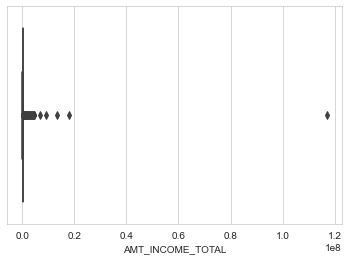

In [64]:
sns.set_style("whitegrid")
sns.boxplot(inpnew["AMT_INCOME_TOTAL"])
plt.show()

In [65]:
inpnew["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
inpnew[inpnew["AMT_INCOME_TOTAL"]==inpnew["AMT_INCOME_TOTAL"].max()]["TARGET"]

12840    1
Name: TARGET, dtype: int64

##### Observation: Record with value 117000000  is the outlier  as it has  very high value & Target as 1 hence dropping the record

In [67]:
#Dropping the outlier
inpnew=inpnew[~(inpnew["AMT_INCOME_TOTAL"]==inpnew["AMT_INCOME_TOTAL"].max())]

In [68]:
#sanity Check
inpnew["AMT_INCOME_TOTAL"].describe()

count    3.075100e+05
mean     1.684180e+05
std      1.088118e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

#### AMT_ANNUITY column

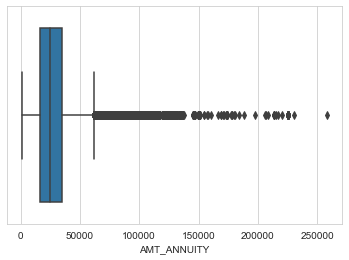

In [69]:
sns.boxplot(inpnew["AMT_ANNUITY"])
plt.show()

In [70]:
inpnew["AMT_ANNUITY"].max()

258025.5

##### Observation: In loan annuity column it is observed that record with value 258025.5 is an outlier.

#### OCCUPATION_TYPE column

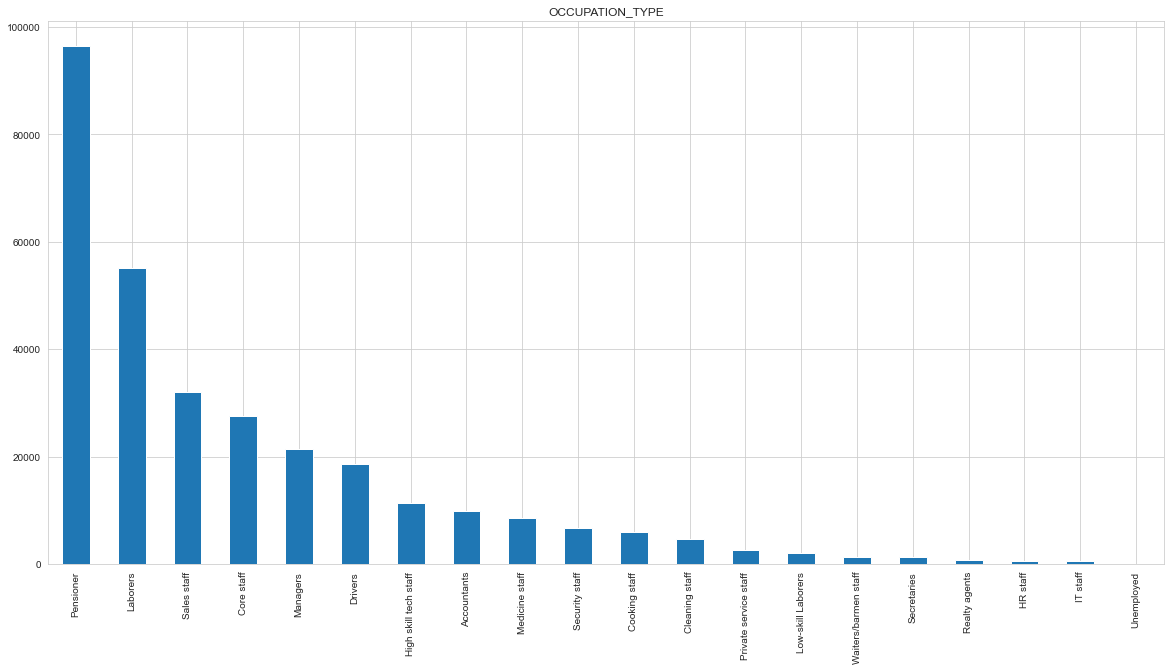

In [71]:
plt.figure(figsize=[20,10])
plt.title("OCCUPATION_TYPE")
inpnew["OCCUPATION_TYPE"].value_counts().plot.bar()
plt.show()

##### Observation:The Majority consists of Labourers, Sales Staff & Core Staff, IT Staff is less.

#### INCOME_RANGE column

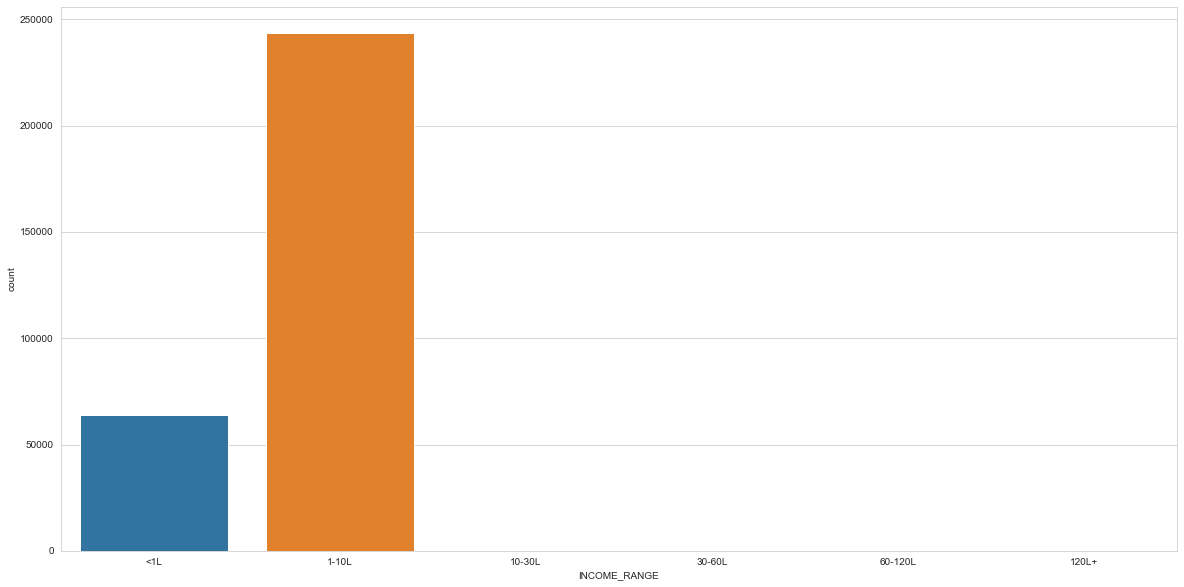

In [72]:
plt.figure(figsize=[20,10])
sns.countplot(inpnew["INCOME_RANGE"])
plt.xlabel("INCOME_RANGE")
plt.show()

##### Observation: mojority of the applicants are having income in the range 1-10Lakhs

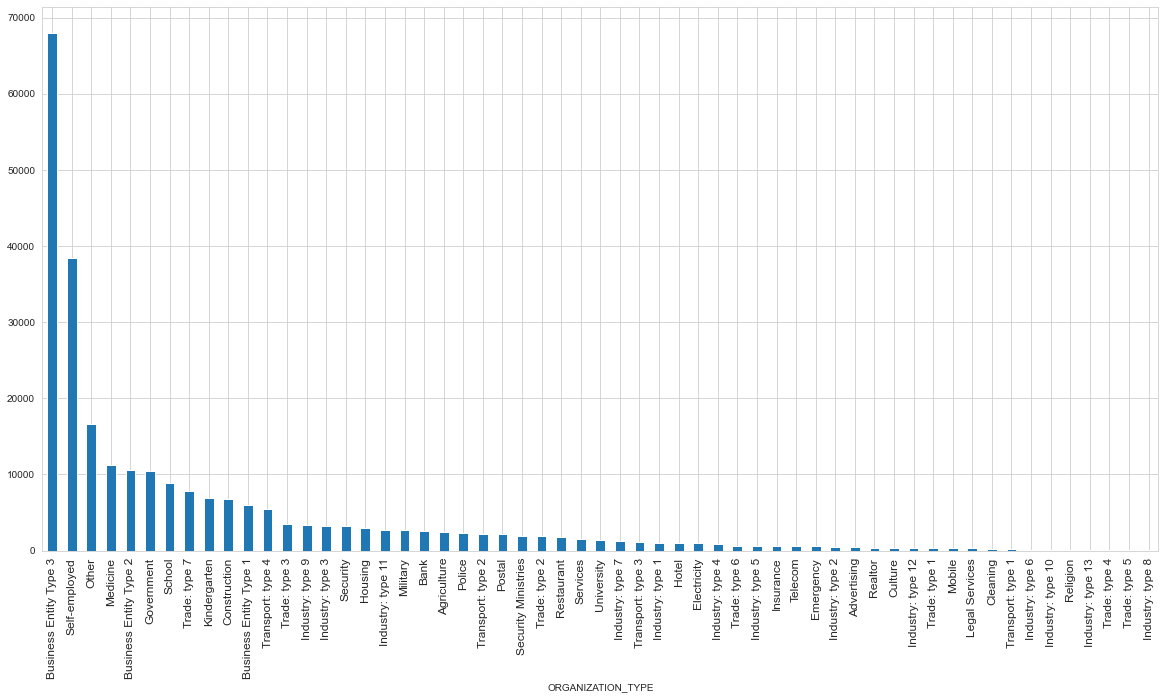

In [73]:
plt.figure(figsize=[20,10])
inpnew["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.xlabel("ORGANIZATION_TYPE")
plt.xticks(fontsize=12)
plt.show()

##### Observation: Majority of the applicants are from Business entity type 3 organization 

## 1.4 Bivariate Analysis

#### INCOME_RANGE vs TARGET

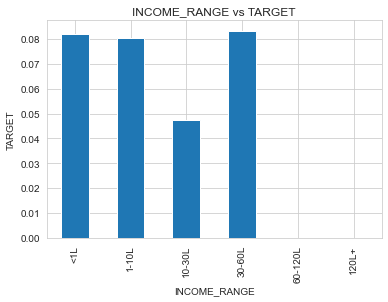

In [74]:
inpnew.groupby("INCOME_RANGE")["TARGET"].mean().plot.bar()
plt.xlabel("INCOME_RANGE")
plt.ylabel("TARGET")
plt.title("INCOME_RANGE vs TARGET")
plt.show()

#####  Observation:  clients with income 60lakhs and above are having target 0 hence less difficulty in payment 

#### AGE_GROUP vs TARGET

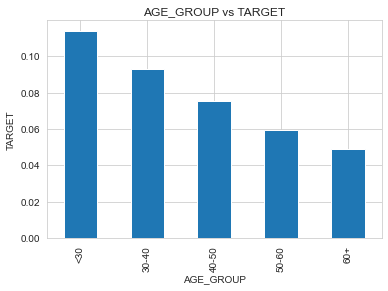

In [75]:
inpnew.groupby("AGE_GROUP")["TARGET"].mean().plot.bar()
plt.xlabel("AGE_GROUP")
plt.ylabel("TARGET")
plt.title("AGE_GROUP vs TARGET")
plt.show()

#####  Observation:  clients with age less than 30 seems to have more difficulty in payment


#### CONTRACT_TYPE vs TARGET

In [76]:
inpnew.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AGE_GROUP', 'INCOME_RANGE', 'DAYS_EMPLOYED_RANGE',
       'OWN_CAR_AGE_RANGE'],
      dtype='object')

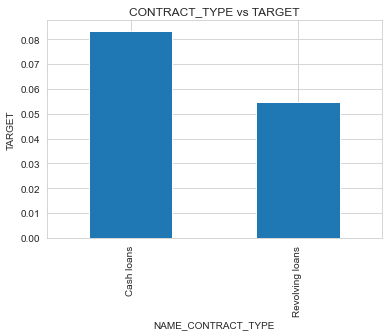

In [77]:
inpnew.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("TARGET")
plt.title("CONTRACT_TYPE vs TARGET")
plt.show()

#####  Observation: clients with cash loans have more difficulty in payment

#### INCOME_TYPE vs TARGET

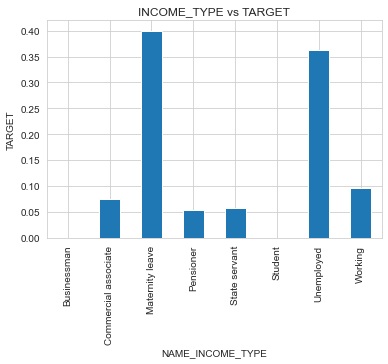

In [78]:
inpnew.groupby("NAME_INCOME_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("TARGET")
plt.title("INCOME_TYPE vs TARGET")
plt.show()

#####  Observation: clients unemployed or on Maternity leave have more difficulty in payment

#### OCCUPATION_TYPE vs TARGET

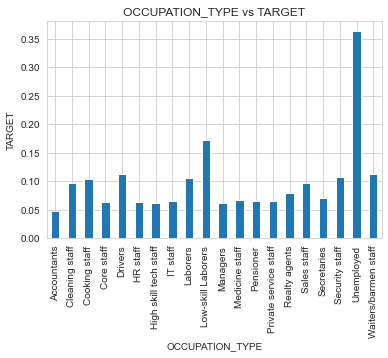

In [79]:
inpnew.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("TARGET")
plt.title("OCCUPATION_TYPE vs TARGET")
plt.show()

#####  Observation: clients unemployed or Low Skilled laborers have more difficulty in payment

#### NAME_EDUCATION_TYPE vs TARGET

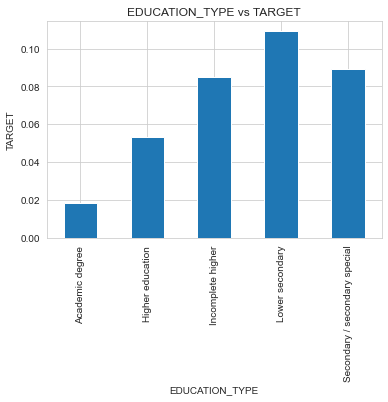

In [80]:
inpnew.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("EDUCATION_TYPE")
plt.ylabel("TARGET")
plt.title("EDUCATION_TYPE vs TARGET")
plt.show()

#####  Observation: Clients with education level Lower Secondary has Difficulty in payment

#### OWN_CAR_AGE_RANGE vs TARGET 

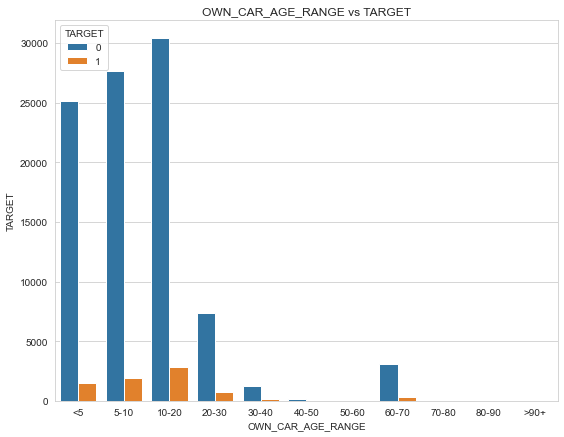

In [81]:
plt.figure(figsize=(9,7))
sns.countplot(x=inpnew["OWN_CAR_AGE_RANGE"],hue=inpnew["TARGET"])
plt.xlabel("OWN_CAR_AGE_RANGE")
plt.ylabel("TARGET")
plt.title("OWN_CAR_AGE_RANGE vs TARGET")
plt.show()

#####  Observation: Clients owning car aged less than 30  have Difficulty in payment

#### DAYS_EMPLOYED_RANGE vs TARGET

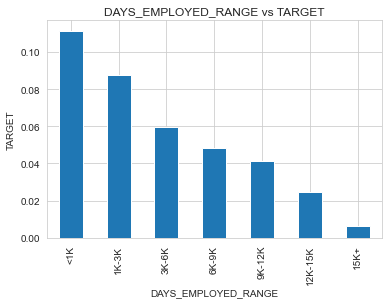

In [82]:
inpnew.groupby("DAYS_EMPLOYED_RANGE")["TARGET"].mean().plot.bar()
plt.xlabel("DAYS_EMPLOYED_RANGE")
plt.ylabel("TARGET")
plt.title("DAYS_EMPLOYED_RANGE vs TARGET")
plt.show()

#####  Observation: Clients with less days of employement or recently employed have Difficulty in payment

#### CODE_GENDER & NAME_CONTRACT_TYPE vs TARGET

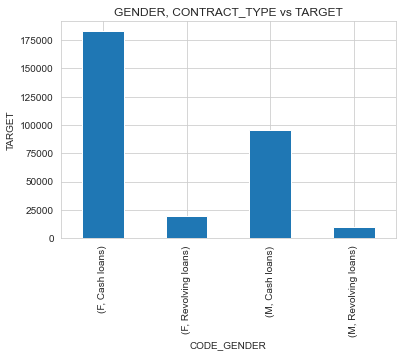

In [83]:
inpnew.groupby(["CODE_GENDER","NAME_CONTRACT_TYPE"])["TARGET"].count().plot.bar()
plt.xlabel("CODE_GENDER")
plt.ylabel("TARGET")
plt.title("GENDER, CONTRACT_TYPE vs TARGET")
plt.show()

#####  Observation: Female Clients have more Difficulty in payment in both cash loans and revolving loans type

#### HOUSING_TYPE vs TARGET 

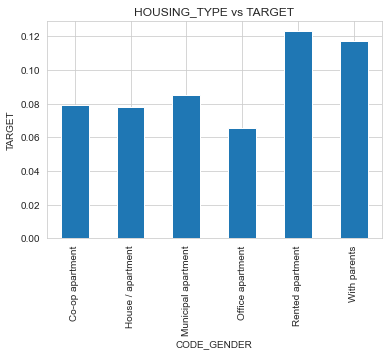

In [84]:
inpnew.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("CODE_GENDER")
plt.ylabel("TARGET")
plt.title("HOUSING_TYPE vs TARGET")
plt.show()

#####  Observation: Clients staying in rented apartments or staying with parents have more Difficulty in payment 


## 1.5 Multi-Variate Analyis

#### CORRELATION OF NUMERIC VARIABLES

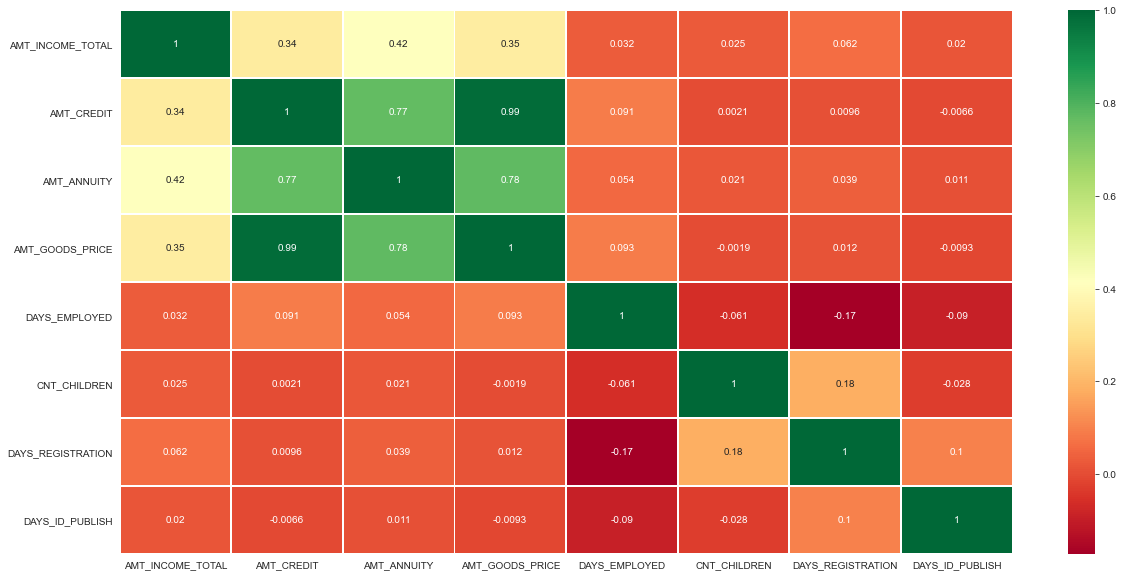

In [85]:
plt.figure(figsize=[20,10])
numeric_corelation=inpnew[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr()
sns.heatmap(numeric_corelation,annot=True,cmap="RdYlGn",linewidth=0.9)
plt.show()

#####  Observation: AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY ARE CORRELATED

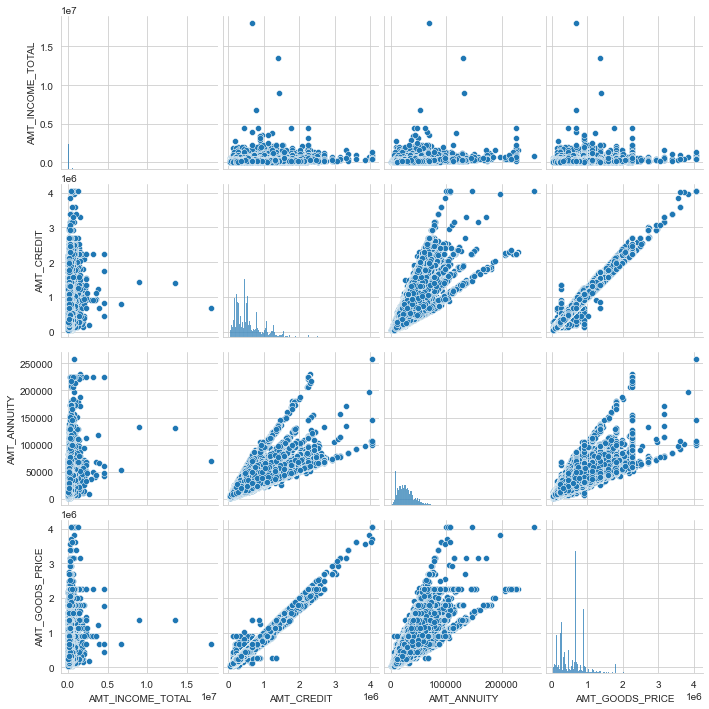

In [86]:
sns.pairplot(inpnew[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

#####  Observation: Higher the goods price, higher is the credit amount & the annuity amount

#### INCOME_TYPE,  GENDER vs TARGET 

<Figure size 720x1440 with 0 Axes>

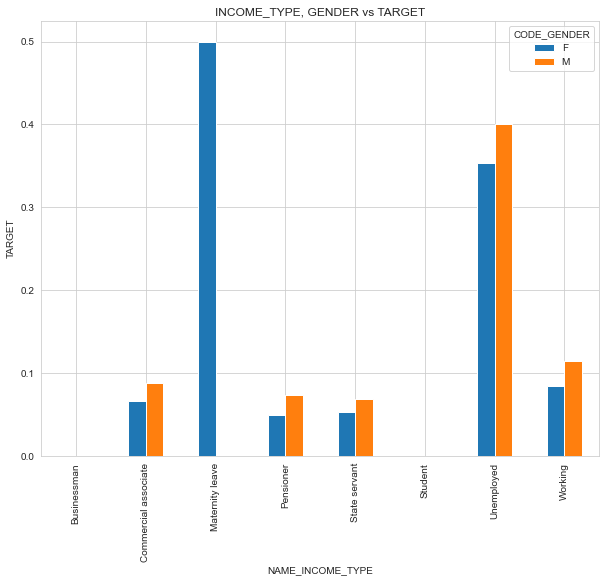

In [87]:
plt.figure(figsize=(10,20))
pd.pivot_table(data=inpnew,columns="CODE_GENDER",index="NAME_INCOME_TYPE",values="TARGET").plot.bar(figsize=(10,8))
plt.ylabel("TARGET")
plt.title("INCOME_TYPE, GENDER vs TARGET")
plt.show()


#####  Observation: Female clients with maternity leave or unemployed female & Male are having difficulty in paying


#### FLAG_OWN_REALTY, INCOME_TYPE vs TARGET

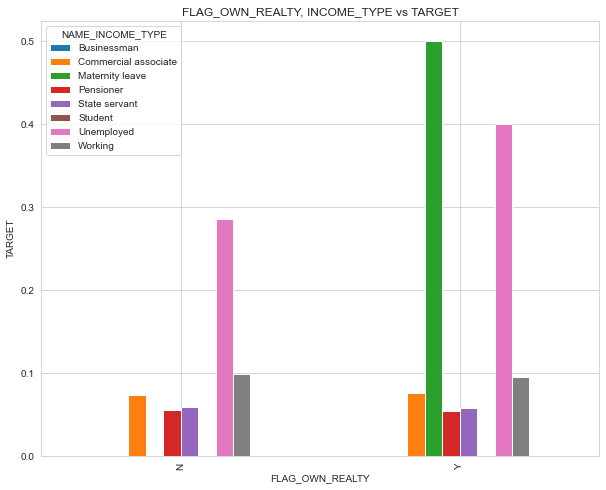

In [88]:
pd.pivot_table(data=inpnew,columns="NAME_INCOME_TYPE",index="FLAG_OWN_REALTY",values="TARGET").plot.bar(figsize=[10,8])
plt.ylabel("TARGET")
plt.title("FLAG_OWN_REALTY, INCOME_TYPE vs TARGET")
plt.show()

#####  Observation: 
##### 1) clients with maternity leave & own realty 
##### 2) unemployed Clients with or without own realty are having difficuty in paying


#### AGE_GROUP, INCOME_TYPE, FLAG_OWN_REALTY vs TARGET

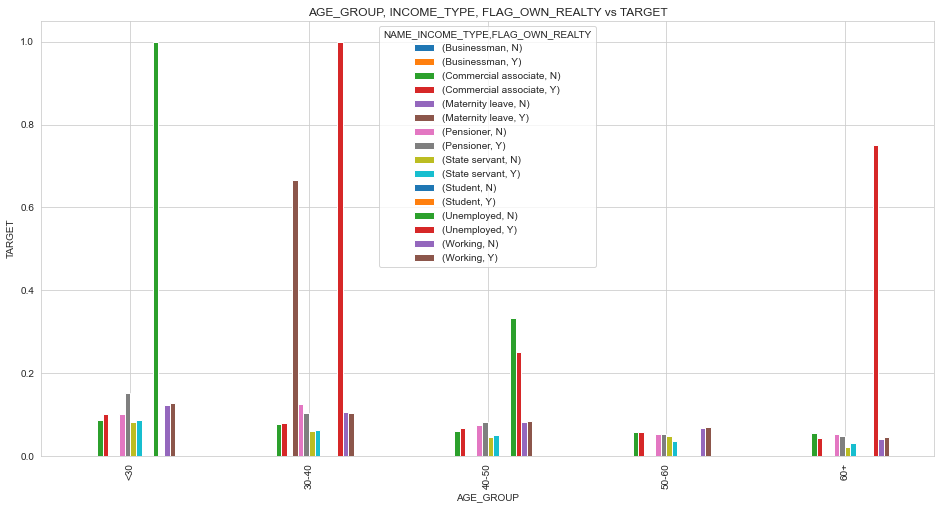

In [89]:
pd.pivot_table(data=inpnew,columns=["NAME_INCOME_TYPE","FLAG_OWN_REALTY"],index="AGE_GROUP",values="TARGET").plot.bar(figsize=[16,8])
plt.ylabel("TARGET")
plt.title("AGE_GROUP, INCOME_TYPE, FLAG_OWN_REALTY vs TARGET")
plt.show()

#####  Observation: 1) Unemployed clients aged less than 30 without own realty 
##### 2) clients aged  30-40  & unemployed 0r on maternity leave are having difficulty in paying


In [90]:
inpnew.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AGE_GROUP', 'INCOME_RANGE', 'DAYS_EMPLOYED_RANGE',
       'OWN_CAR_AGE_RANGE'],
      dtype='object')

#### CODE_GENDER, EDUCATION_TYPE, INCOME_RANGE vs TARGET

<Figure size 720x1440 with 0 Axes>

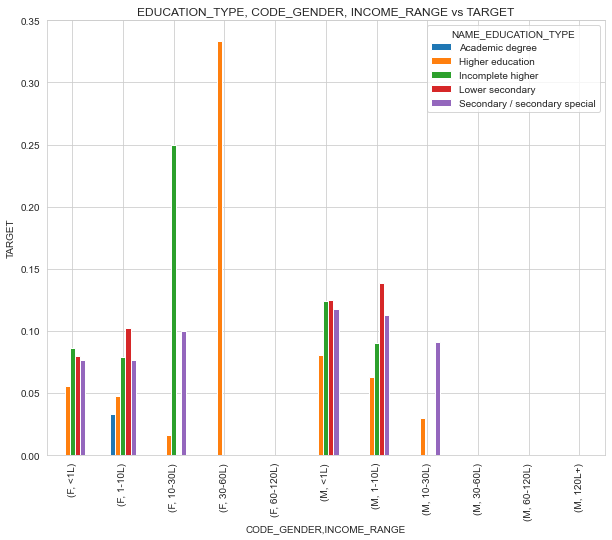

In [91]:
plt.figure(figsize=(10,20))
pd.pivot_table(data=inpnew,columns="NAME_EDUCATION_TYPE",index=["CODE_GENDER","INCOME_RANGE"],values="TARGET").plot.bar(figsize=(10,8))
plt.ylabel("TARGET")
plt.title("EDUCATION_TYPE, CODE_GENDER, INCOME_RANGE vs TARGET")
plt.show()

#####  Observation: 1) Female clients with Higher education & income range between 30-60 lakhs have difficulty in payment
##### 2)Female clients with incomplete higher with income 10-30 lakhs have difficulty in payment
##### 3)Male clients with Lower secondary education with income less than 10 lakhs have difficulty in payment

# 2. Data Analysis on Previous Application data


### Inspecting The Previous Application Dataframe

In [92]:
inpold.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
inpold.shape

(1670214, 37)

In [94]:
inpold.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 2.1 Data cleaning

In [95]:
#Checking Columns with % of null values
inpold.isnull().sum()/inpold.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [96]:
#Dropping columns with maximum null values
inpold.drop(inpold.loc[:,"PRODUCT_COMBINATION":"NFLAG_INSURED_ON_APPROVAL"].columns,axis=1,inplace=True)
inpold.drop(["RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","AMT_DOWN_PAYMENT","NAME_TYPE_SUITE"],axis=1,inplace=True)

In [97]:
#Dropping non-relevant columns which doesn't help in our analysis
inpold.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"],axis=1,inplace=True)

In [98]:
#sanity check
inpold.shape

(1670214, 23)

In [99]:
inpold.isin(["XNA","XNP"]).sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                 346
AMT_ANNUITY                          0
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_GOODS_PRICE                      0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CASH_LOAN_PURPOSE          677918
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               627384
CODE_REJECT_REASON                5244
NAME_CLIENT_TYPE                  1941
NAME_GOODS_CATEGORY             950809
NAME_PORTFOLIO                  372230
NAME_PRODUCT_TYPE              1063666
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY            855720
CNT_PAYMENT                          0
NAME_YIELD_GROUP                517215
dtype: int64

In [100]:
# imputing XNA and XNP which means missing value with np.nan
inpold.replace(["XNA","XNP"],np.nan,inplace=True)

In [101]:
inpold.replace(["XAP"],np.nan,inplace=True)

In [102]:
#sanity check
inpold.isin(["XNA","XNP"]).sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
dtype: int64

### 2.2 Univerate Analysis

#### CONTRACT_STATUS column

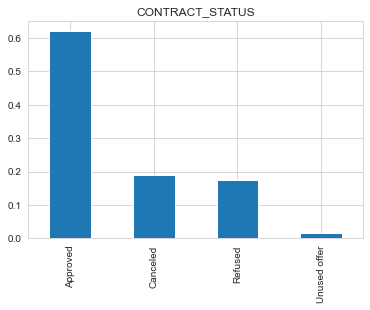

In [103]:
inpold["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.bar()
plt.title("CONTRACT_STATUS")
plt.show()

#####  Observation: majority of loans are approved and very less percentage of loans are unused offer

#### GOODS_CATEGORY column

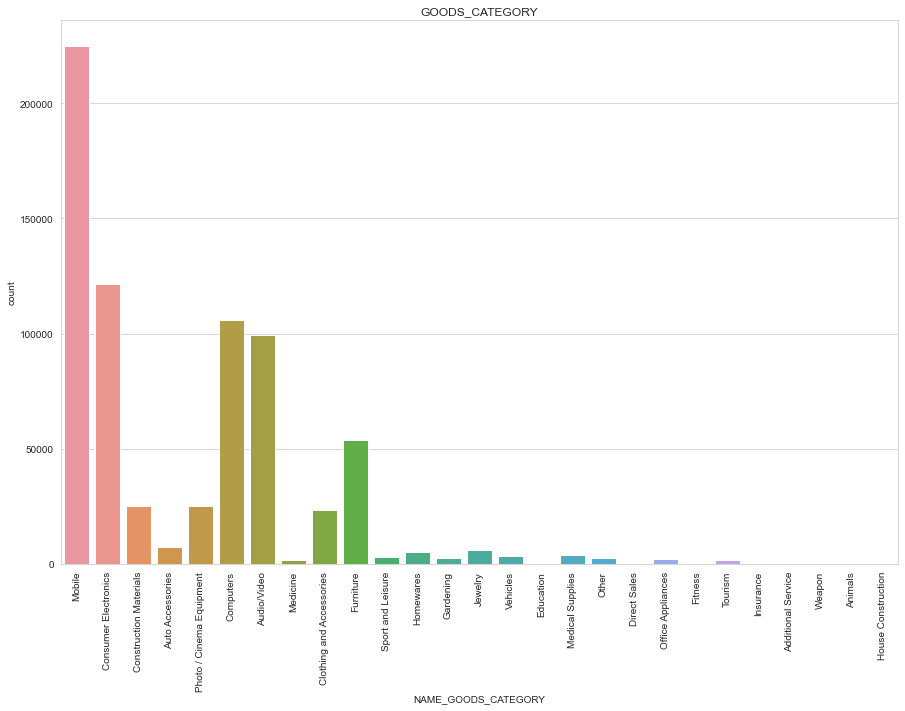

In [104]:
plt.figure(figsize=[15,10])
sns.countplot(inpold["NAME_GOODS_CATEGORY"])
plt.xticks(rotation=90)
plt.title("GOODS_CATEGORY")
plt.show()

#####  Observation: majority of loans are for goods type Mobile,consumer electronics,Computers,Audio/Video

#### REJECT_REASON column

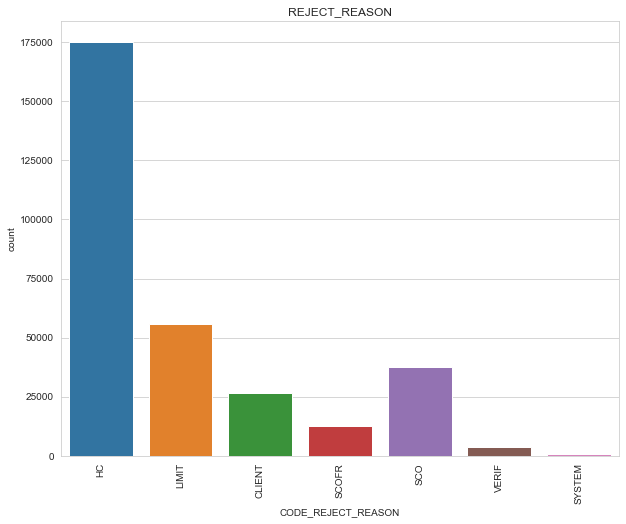

In [105]:
plt.figure(figsize=[10,8])
sns.countplot(inpold["CODE_REJECT_REASON"])
plt.xticks(rotation=90)
plt.title("REJECT_REASON")
plt.show()

#####  Observation: HC is the reason majority of applications got rejetced.

#### CLIENT_TYPE column

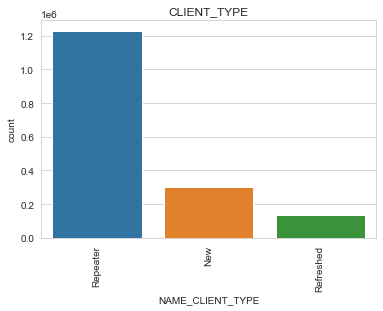

In [106]:

sns.countplot(inpold["NAME_CLIENT_TYPE"])
plt.xticks(rotation=90)
plt.title("CLIENT_TYPE")
plt.show()

#####  Observation: Most of the Clients are Repeaters

## 2.3 Merging Application and Previous Application Data Frames


In [107]:
inpmerged=pd.merge(inpnew,inpold,how="inner",on="SK_ID_CURR")

In [108]:
inpmerged.shape

(1413698, 58)

In [109]:
inpmerged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AGE_GROUP',
       'INCOME_RANGE', 'DAYS_EMPLOYED_RANGE', 'OWN_CAR_AGE_RANGE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'FLAG_

### 2.4 Bivariate & Multivariate Analysis

#### CONTRACT_STATUS vs TARGET

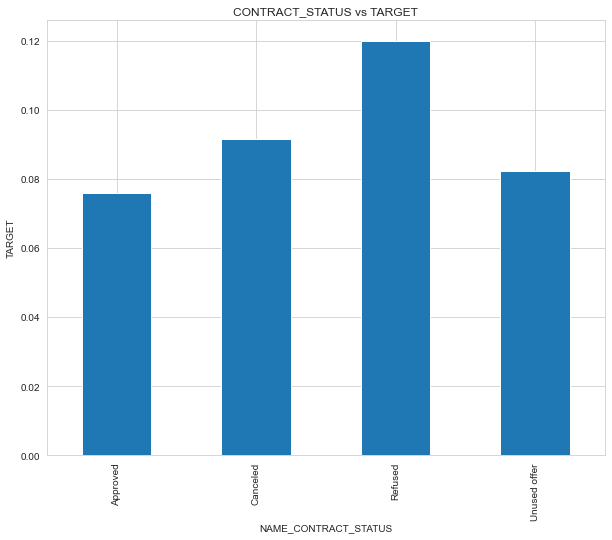

In [110]:
inpmerged.groupby(["NAME_CONTRACT_STATUS"])["TARGET"].mean().plot.bar(figsize=[10,8])
plt.ylabel("TARGET")
plt.title("CONTRACT_STATUS vs TARGET")
plt.show()

#####  Observation: Refused contracts from previous application have maximum % of Loan-Payment Difficulties from current application.
##### Clients whose previous application was approved have less % with Loan-Payment Difficulties from current application

#### CLIENT_TYPE,CONTRACT_STATUS vs TARGET

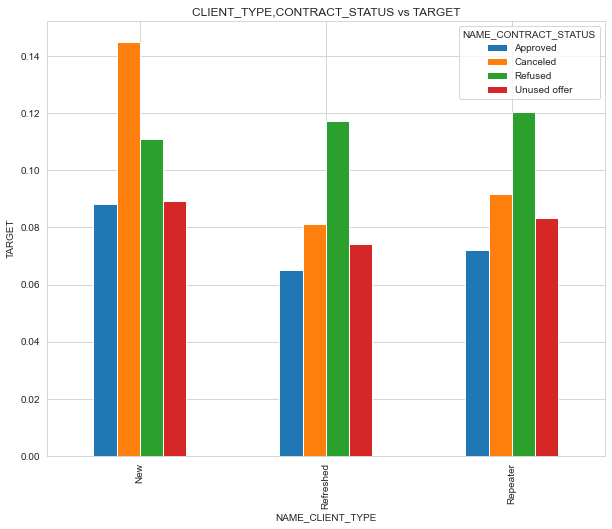

In [111]:
pd.pivot_table(inpmerged, index ="NAME_CLIENT_TYPE", columns = "NAME_CONTRACT_STATUS", values= "TARGET").plot.bar(figsize=(10,8))
plt.ylabel("TARGET")
plt.title("CLIENT_TYPE,CONTRACT_STATUS vs TARGET")
plt.show()

#####  Observation: 1) More  % of cancelled and approved application previously are observed for new clients and are having difficulty in payment
#####  2) Number of refused requests is same across all client types

#### LOAN_PURPOSE vs TARGET

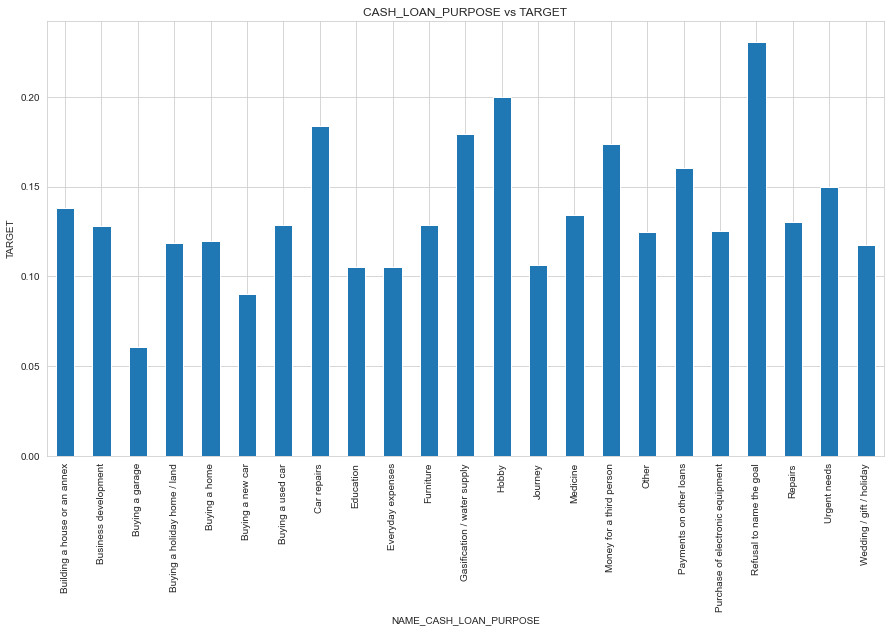

In [112]:
inpmerged.groupby("NAME_CASH_LOAN_PURPOSE")["TARGET"].mean().plot.bar(figsize=(15,8))
plt.ylabel("TARGET")
plt.title("CASH_LOAN_PURPOSE vs TARGET")
plt.show()

#####  Observation: Clients with loan purposes stated as Refusal to name the goal, Hobby and Car repairs have payment difficulties

#### CASH_LOAN_PURPOSE,REJECT_REASON vs TARGET


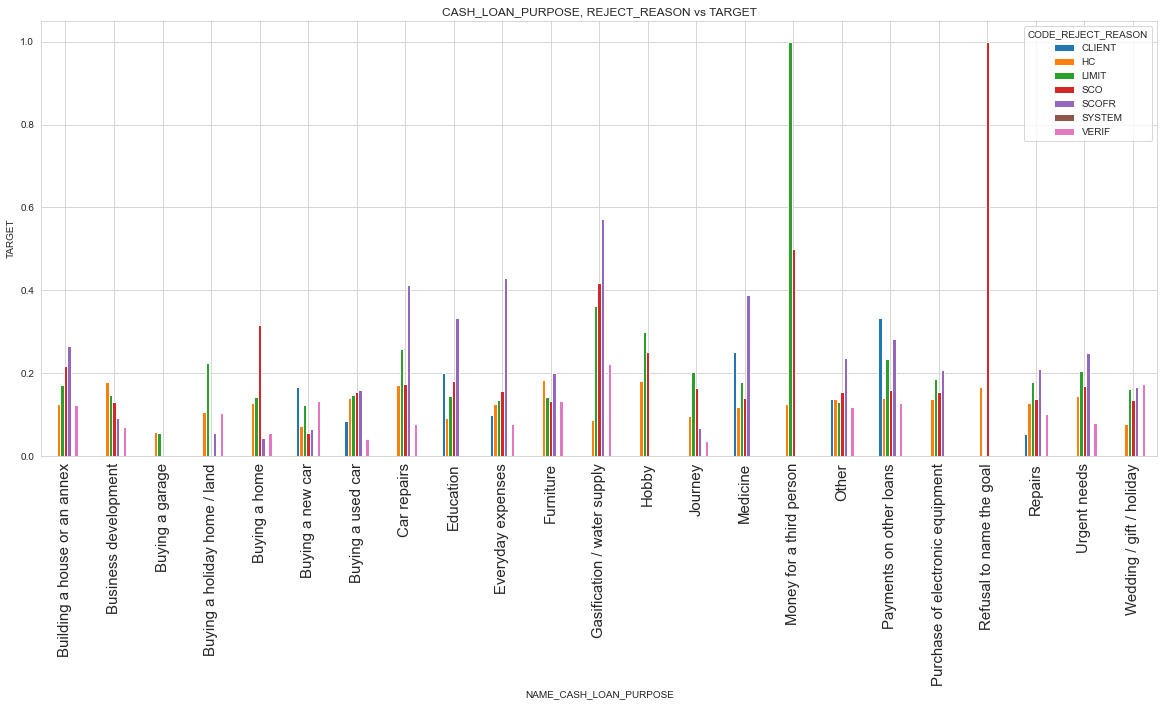

In [113]:
pd.pivot_table(data=inpmerged,index="NAME_CASH_LOAN_PURPOSE",columns = "CODE_REJECT_REASON",values="TARGET").plot.bar(figsize=[20,8])
plt.xticks(fontsize =15)
plt.ylabel("TARGET")
plt.title("CASH_LOAN_PURPOSE, REJECT_REASON vs TARGET")
plt.show()

#####  Observation: Clients with loan purposes stated as Refusal to name the goal, with  rejected application for SCO previuosly have payment difficulties
##### Clients with loan purposes stated as Money for third person, with Rejected application for LIMIT previously have payment difficulties  

#### OCCUPATION_TYPE,REJECT_REASON vs TARGET


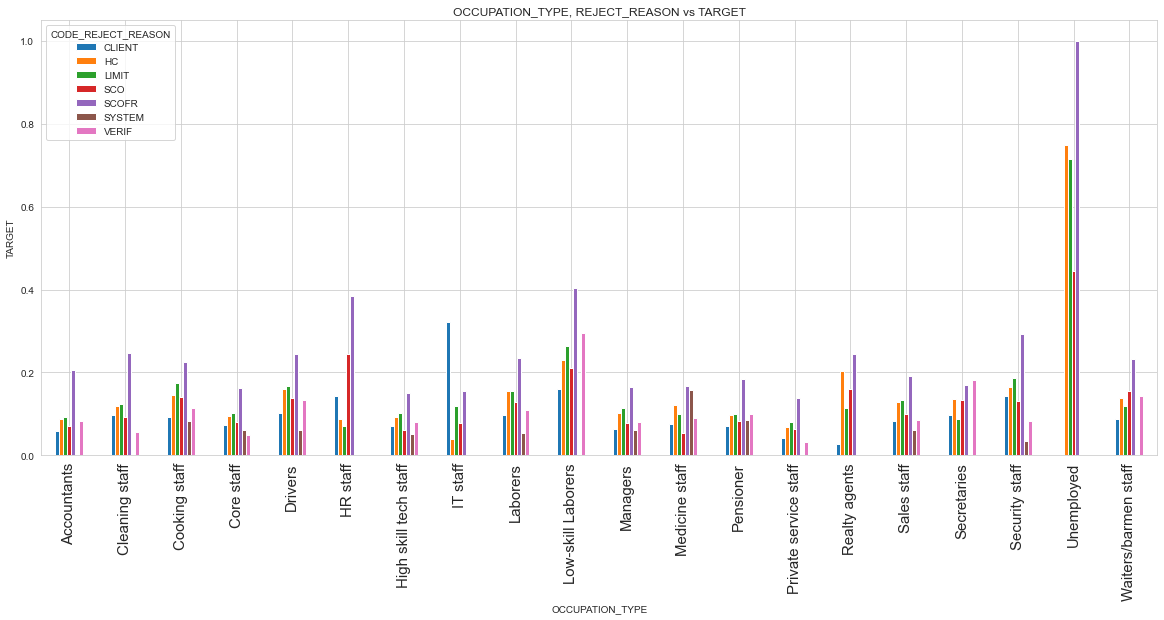

In [114]:
pd.pivot_table(data=inpmerged,index="OCCUPATION_TYPE",columns = "CODE_REJECT_REASON",values="TARGET").plot.bar(figsize=[20,8])
plt.xticks(fontsize =15)
plt.ylabel("TARGET")
plt.title("OCCUPATION_TYPE, REJECT_REASON vs TARGET")
plt.show()

#####  Observation:Unemployed Clients, with rejected application for SCOFR or HC previuosly have payment difficulties

#### INCOME_RANGE, REJECT_REASON vs TARGET

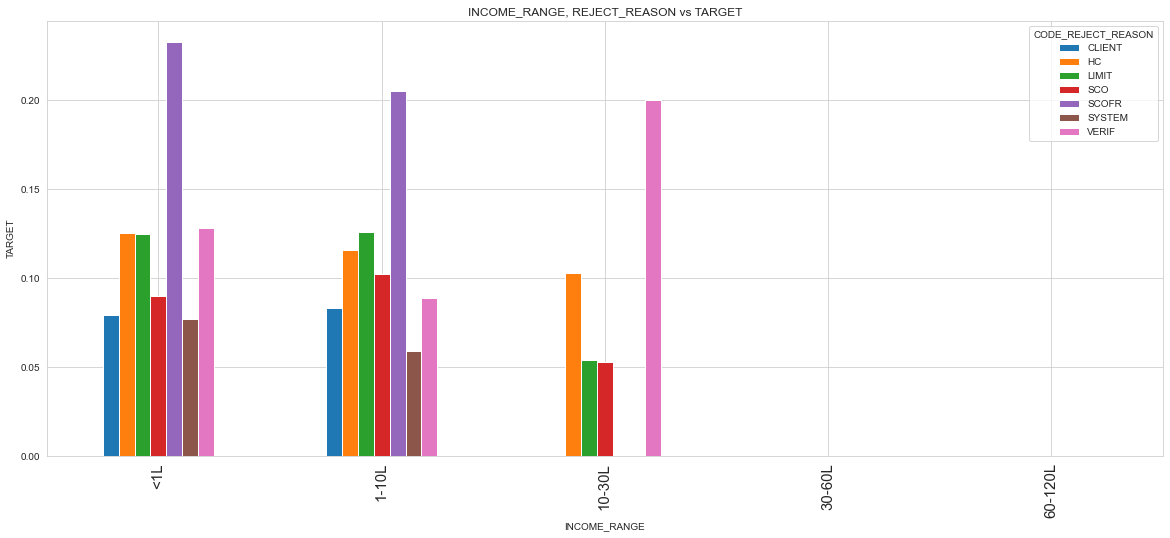

In [115]:
pd.pivot_table(data=inpmerged,index="INCOME_RANGE",columns = "CODE_REJECT_REASON",values="TARGET").plot.bar(figsize=[20,8])
plt.xticks(fontsize =15)
plt.ylabel("TARGET")
plt.title("INCOME_RANGE, REJECT_REASON vs TARGET")
plt.show()

#####  Observation: 1)Clients in income range less than 1lakh with rejected application for SCOFR previuosly have payment difficulties
##### 2)Clients in income range 1-10lakh with rejected application for SCOFR previuosly have payment difficulties
##### 3)Clients in income range 10-30lakh with rejected application for VERIF previuosly have payment difficulties


## Conclusion

### Recommended groups 
- Approved clients in their previous applications.
- Highly educated clients. 
- Clients with higher income.
- Senior citizens in all categories.
- Male clients are comparatively favourable than females.

### Risky groups 
- Previously refused, cancelled or unused offer clients.
- Low income groups with previously refused status.
- Unemployed clients.
- Young clients are comparatively riskier than mid age clients and senior citizens.
- Lower secondary and secondary educated clients.
- Clients with loan purpose as 'Refusal to name the goal', 'Hobby', 'Money for a third person' and 'Car repairs’.
- Clients having lesser days of employment 